<h1>Spearman correlation coefficient matrix

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Beispiel-Daten erstellen
data = {
    'wind_speed': [1, 2, 3, 4, 5],
    'temperature': [5, 6, 7, 8, 7],
    'pressure': [10, 9, 2, 4, 3],
    'production': []
}
df = pd.DataFrame(data)

# Spearman-Korrelationsmatrix berechnen
spearman_corr_matrix = df.corr(method='spearman')

print("Spearman-Korrelationsmatrix:")
print(spearman_corr_matrix)


<h1>COSMO-REA6 (irregular grid)</h1>

load historical weather data (wind speed)

In [ ]:
import numpy as np
import netCDF4 as nc
from netCDF4 import num2date

wind_speed_file = "data/weather_history/COSMO_REA6/WS_100m.2D.201501.nc4"

wind_speed = nc.Dataset(wind_speed_file)

number_hours = 48

lons = wind_speed['RLON'][:].filled(np.nan)
lons = np.where(lons > 180, lons - 360, lons)
lats = wind_speed['RLAT'][:].filled(np.nan)
time_unit = wind_speed['time'].units
times = num2date(wind_speed['time'][:number_hours], time_unit)
times = np.array([np.datetime64(t.strftime('%Y-%m-%dT%H:%M:%S')) for t in times])
wind_speeds = wind_speed['wind_speed'][:number_hours,:,:].filled(np.nan) # convert masked array to regular array by converting masked values to nan values

np.save("data/weather_history/COSMO_REA6/lons.npy", lons)
np.save("data/weather_history/COSMO_REA6/lats.npy", lats)
np.save("data/weather_history/COSMO_REA6/times.npy", times)
np.save("data/weather_history/COSMO_REA6/wind_speeds.npy", wind_speeds)

wind speeds (COSMO-REA6)

In [ ]:
import netCDF4 as nc

fn = r"C:\Users\alexa\Documents\Webapp\data\weather_history\WS_100m.2D.199501.nc4" # January 1995
ds = nc.Dataset(fn)

print(ds)

time = ds.variables['time'][:]
lon = ds.variables['RLON'][:]
lat = ds.variables['RLAT'][:]
wind_speed = ds.variables['wind_speed'][:]

for i in range(len(lon)):
    for j in range(len(lon[0])):
        lon[i,j] = lon[i,j] - 360 if lon[i,j] > 180 else lon[i,j]

three different visualisations

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


# Erstelle eine Karte mit cartopy
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Trage die Windgeschwindigkeit auf der Karte ein
plt.contourf(lon, lat, wind_speed[0,:,:], transform=ccrs.PlateCarree(), cmap='viridis')

# Füge Küstenlinien hinzu
ax.coastlines()

# Zeige die Karte
plt.colorbar(label="Windgeschwindigkeit (m/s)")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Erstelle eine Karte mit curvilinearen Daten
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Zeichne die Windgeschwindigkeit auf dem curvilinearen Gitter
plt.pcolormesh(lon, lat, wind_speed[0,:,:], transform=ccrs.PlateCarree(), cmap='viridis')

# Füge Küstenlinien hinzu
ax.coastlines()

# Zeige die Karte
plt.colorbar(label="Windgeschwindigkeit (m/s)")
plt.show()


In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Verwende eine Lambert-Projektion
ax = plt.axes(projection=ccrs.LambertConformal())

# Zeichne die Windgeschwindigkeit auf dem curvilinearen Gitter
plt.contourf(lon, lat, wind_speed[0,:,:], transform=ccrs.PlateCarree(), cmap='coolwarm')

# Küstenlinien und Raster hinzufügen
ax.coastlines()
ax.gridlines()

plt.colorbar(label="Windgeschwindigkeit (m/s)")
plt.show()


<h1>save production history example as parquet file

In [ ]:
import pandas as pd

# Lade die Excel-Datei nur einmal, filtere die relevanten Daten und speichere sie als Parquet-Datei
example_file = "data/production_history/Example/example_time_series.xlsx" 
df = pd.read_excel(example_file)

# Speichere die gefilterten Daten im Parquet-Format (deutlich schneller zu lesen und schreiben, als Excel-Dateien, und auch platzsparender)
df.to_parquet("data/production_history/Example/example_time_series.parquet")

<h1>power curve

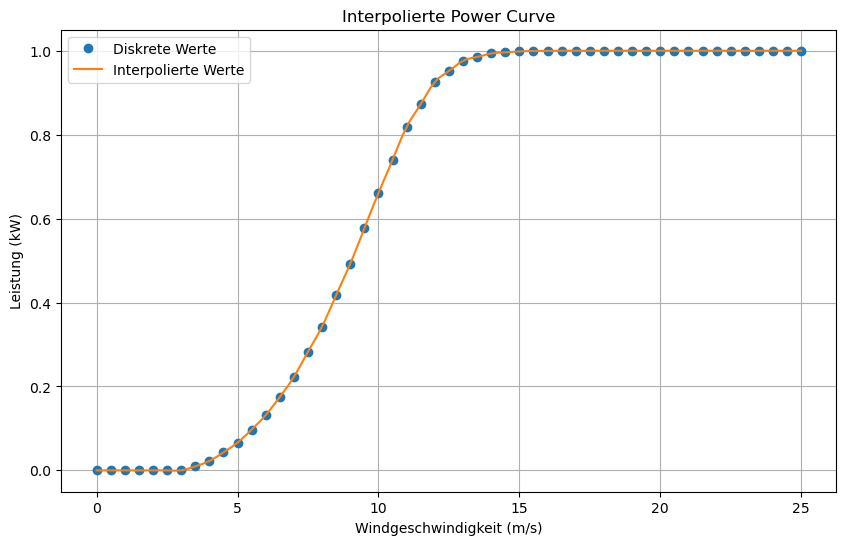

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Definiere die Power Curve (Windgeschwindigkeit und Leistung)
wind_speeds = np.arange(0, 25.5, 0.5)  # Windgeschwindigkeiten
power_output = [0]*7 + [35, 80, 155, 238, 350, 474, 630, 802, 1018, 1234, 1504, 1773, 2076, 2379, 2664, 2948, 3141, 3334, 3425, 3515, 3546, 3577, 3586, 3594, 3598, 3599] + [3600]*18  # Leistung
max_cap = 3600
power_output_norm = [x / max_cap for x in power_output]
wind_speed_max = 25

# Erstelle die Interpolationsfunktion
interpolation_function = interp1d(wind_speeds, power_output_norm, kind='cubic', fill_value="extrapolate")

# Beispiel für Interpolation: Bestimme Werte für feinere Windgeschwindigkeiten
fine_wind_speeds = np.linspace(0, 25, 100)  # Feinere Windgeschwindigkeiten
interpolated_power_output = interpolation_function(fine_wind_speeds)

# Plot der diskreten und interpolierten Power Curve
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, power_output_norm, 'o', label='Diskrete Werte')  # Diskrete Punkte
plt.plot(fine_wind_speeds, interpolated_power_output, '-', label='Interpolierte Werte')  # Interpolierte Werte
plt.xlabel('Windgeschwindigkeit (m/s)')
plt.ylabel('Leistung (kW)')
plt.title('Interpolierte Power Curve')
plt.legend()
plt.grid(True)
plt.show()

data generation with power curve